### Template for NLP project

The aim of the project is to achieve the following:
 - Train a neural network that is **at least better than random guessing** on your dataset. The template contains the IMDB dataset for sentiment analysis, however, you can choose any other language related data set with the appropriate NLP task.
 - Investigate different neural network architectures (different hyperparameters, different layers, different pre-processing). Explain in the presentation, why the final network was selected! **Do not rely on black-box mechanisms.**
 

In [1]:
# tensorflow modules
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Embedding, Dense, SimpleRNN, LayerNormalization
import tensorflow
import matplotlib.pyplot as plt
# if you have installed a different version, replace 'r2.6'  with your version in links provided below
print(tensorflow.__version__)

2.9.0


In [2]:
# load imdb dataset
# links to dataset
# original dataset: https://ai.stanford.edu/~amaas/data/sentiment/
# version in tensorflow: https://www.tensorflow.org/versions/r2.6/api_docs/python/tf/keras/datasets/imdb

# select your vocabulary size
vocabularySize = 5000
# load data (it is already pre-processed)
# optional: add other pre.processing steps like stopword removal
(xTrain, yTrain), (xTest, yTest) = imdb.load_data(num_words=vocabularySize)
print('Loaded dataset with {} training samples, {} test samples'.format(len(xTrain), len(xTest)))

# look at the data
print('---review---')
print(xTrain[123])
print(xTrain[124])
print('---label---')
print(yTrain[123])

# look at the respective words
word2id = imdb.get_word_index()
id2word = {i: word for word, i in word2id.items()}
print('---review with words---')
print([id2word.get(i, ' ') for i in xTrain[123]])


# other related dataset already in tensorflow:  reuters newswire classification dataset
# see https://www.tensorflow.org/versions/r2.6/api_docs/python/tf/keras/datasets/reuters

Loaded dataset with 25000 training samples, 25000 test samples
---review---
[1, 307, 5, 1301, 20, 1026, 2511, 87, 2775, 52, 116, 5, 31, 7, 4, 91, 1220, 102, 13, 28, 110, 11, 6, 137, 13, 115, 219, 141, 35, 221, 956, 54, 13, 16, 11, 2714, 61, 322, 423, 12, 38, 76, 59, 1803, 72, 8, 2, 23, 5, 967, 12, 38, 85, 62, 358, 99]
[1, 518, 12, 304, 6, 22, 231, 1300, 40, 2, 8, 721, 15, 1727, 117, 142, 15, 955, 2, 5, 2, 2, 15, 2, 6, 87, 20, 42, 6, 87, 229, 83, 6, 991, 31, 18, 4, 2088, 10, 10, 45, 24, 43, 15, 1660, 4669, 65, 47, 195, 3549, 5, 2, 231, 12, 878, 18, 60, 4, 91, 2, 7, 907, 8, 717, 2304, 60, 711, 309, 161, 2396, 38, 78, 45, 89, 2, 2, 4669, 2518, 89, 29, 2, 4, 1511, 83, 268, 58, 15, 2, 4, 3537, 199, 6, 1114, 2, 5, 6, 2, 2, 11, 940, 10, 10, 2, 717, 2, 136, 9, 17, 633, 1307, 4, 20, 4608, 19, 6, 2, 2455, 4764, 1062, 60, 151, 45, 1082, 702, 885, 2699, 1993, 5, 12, 2, 33, 57, 329, 74, 2, 234, 4, 370, 2, 143, 4, 2, 2, 7, 4, 4909, 1455, 40, 12, 9, 49, 243, 7, 2, 2, 2, 18, 4665, 2, 2, 665, 2, 4, 2, 

# Preprocessing

In [3]:
from nltk.corpus import stopwords

In [4]:
#load Stopwords
stopWords = set(stopwords.words('english'))
print(stopWords)

{'myself', 'an', "shouldn't", "needn't", 'my', 'of', 'over', 'because', 'have', "wouldn't", "hasn't", 'those', 'and', 'this', 'by', "won't", 'i', 'him', 'wasn', 'for', "shan't", "it's", "mustn't", 'after', 'doesn', 'be', 'it', 'once', 'what', 'only', 'mightn', "haven't", 'our', 'your', 'theirs', "you'd", 'her', 'y', 'above', 'will', 'had', 'having', 'd', "don't", 'with', 'yourselves', 'been', 'off', 'can', 'isn', 'whom', 'in', 'to', 'before', 'just', 'they', "aren't", 'mustn', 'she', 'some', 'couldn', 'each', 'few', 'same', "didn't", 'at', 'these', 'during', 'where', 'again', 'll', "that'll", 'out', 'here', 'ours', 'both', 'shouldn', 'then', 'o', 'no', 'doing', 'now', 'didn', 'why', 'through', 'hasn', 'such', 'do', "hadn't", 's', 'has', 'any', 'down', 'or', 'than', 'while', 've', 'a', 'most', 'so', "weren't", 'not', 'there', "isn't", 'under', 'them', 'wouldn', 'too', 'hers', 'haven', 'about', 'm', 'on', 'below', "you'll", 'their', 'we', 'the', "you're", 'you', 'shan', 'how', 'he', "sho

In [5]:
stopWordNumbers = []

for word in stopWords:
    stopwordId = word2id.get(word, 0)
    stopWordNumbers.append(stopwordId)

print(stopWordNumbers)

[543, 32, 1613, 12421, 58, 4, 117, 85, 25, 583, 1478, 145, 2, 11, 31, 525, 10, 87, 29877, 15, 24086, 42, 24007, 100, 20830, 27, 9, 277, 48, 61, 0, 771, 260, 126, 9127, 1387, 38, 5132, 749, 77, 66, 257, 1092, 89, 16, 9888, 74, 122, 67, 20781, 934, 8, 5, 156, 40, 33, 710, 0, 56, 46, 26232, 254, 168, 169, 158, 30, 131, 312, 118, 171, 8725, 9540, 43, 130, 11292, 196, 0, 92, 1601, 54, 396, 147, 15496, 135, 140, 41026, 138, 78, 1866, 587, 44, 98, 177, 39, 71, 134, 13340, 3, 88, 35, 1170, 21, 47, 215, 464, 95, 39964, 96, 6139, 19932, 41, 1980, 20, 1905, 487, 65, 72, 1, 332, 22, 41501, 86, 26, 5460, 53, 82, 439, 12, 23, 124, 1034, 141, 0, 827, 306, 426, 1196, 8634, 6, 91, 50, 69, 0, 530, 241, 60, 0, 423, 80, 13, 52, 119, 283, 621, 407, 0, 149, 18, 882, 109, 36, 68, 14, 363, 202, 793, 29, 1558, 871, 51, 3144, 0, 762, 24, 6444, 34, 45, 52778, 197]


In [6]:
print(len(xTrain))
print(len(xTrain[0]))

25000
218


In [7]:

#for review in xTrain:
def removeStopWordsSpace(minValue, maxValue):
    removedWords = 0
    counter = minValue

    while counter <= maxValue:
        #print("StartLen:",len(xTrain[counter]))
        for word in xTrain[counter]:
            if word in stopWordNumbers:
                xTrain[counter].remove(word)
                removedWords+=1
        #print("EndLine:", len(xTrain[counter]))
        counter+=1
    return removedWords

def remvoeStopWords():
    print("Remove Words")
    startSpace = 0
    endSpace = 999
    while endSpace <= 25000:
        removedWords = removeStopWordsSpace(startSpace, endSpace)
        startSpace+=1000
        endSpace+=1000
        print("Step start:", startSpace, ", End:", endSpace, ", RemovedWords: ", removedWords)

remvoeStopWords()


#print("xTrain: len: ", len(xTrain[123], ", words:", xTrain[123])
        

Remove Words
Step start: 1000 , End: 1999 , RemovedWords:  88135
Step start: 2000 , End: 2999 , RemovedWords:  85981
Step start: 3000 , End: 3999 , RemovedWords:  89561
Step start: 4000 , End: 4999 , RemovedWords:  90407
Step start: 5000 , End: 5999 , RemovedWords:  85889
Step start: 6000 , End: 6999 , RemovedWords:  83455
Step start: 7000 , End: 7999 , RemovedWords:  84079
Step start: 8000 , End: 8999 , RemovedWords:  86079
Step start: 9000 , End: 9999 , RemovedWords:  82952
Step start: 10000 , End: 10999 , RemovedWords:  85457
Step start: 11000 , End: 11999 , RemovedWords:  83881
Step start: 12000 , End: 12999 , RemovedWords:  83455
Step start: 13000 , End: 13999 , RemovedWords:  85520
Step start: 14000 , End: 14999 , RemovedWords:  89032
Step start: 15000 , End: 15999 , RemovedWords:  88430
Step start: 16000 , End: 16999 , RemovedWords:  84654
Step start: 17000 , End: 17999 , RemovedWords:  85100
Step start: 18000 , End: 18999 , RemovedWords:  85459
Step start: 19000 , End: 19999 , 

In [8]:
imdb

<module 'keras.api._v2.keras.datasets.imdb' from 'C:\\Users\\andre\\AppData\\Local\\Programs\\Python\\Python39\\lib\\site-packages\\keras\\api\\_v2\\keras\\datasets\\imdb\\__init__.py'>

In [9]:
# get properties of the dataset
print('Maximum train review length: {}'.format(len(max(xTrain, key=len))))
print('Maximum test review length: {}'.format(len(max(xTest, key=len))))
print('Minimum train review length: {}'.format(len(min(xTrain, key=len))))
print('Minimum test review length: {}'.format(len(min(xTest, key=len))))

Maximum train review length: 1566
Maximum test review length: 2315
Minimum train review length: 6
Minimum test review length: 7


In [10]:
# select maximum number of words as input lengt
# pad or truncated (this is done automatically) your data
maxWords = 1000
xTrain = sequence.pad_sequences(xTrain, maxlen=maxWords)
xTest = sequence.pad_sequences(xTest, maxlen=maxWords)

In [11]:
# setup the neural network architecture
# check out the respective tensorflow help page: https://www.tensorflow.org/guide/keras/rnn
model=Sequential()

# define size of embedding, see https://www.tensorflow.org/versions/r2.9/api_docs/python/tf/keras/layers/Embedding
# optional: use a different embedding like word2vec or other options available within tensorflow 
embeddingSize = 32
model.add(Embedding(vocabularySize, embeddingSize, input_length=maxWords))

# add recurrent layers: 
# e.g. a SimpleRNN (https://www.tensorflow.org/versions/r2.9/api_docs/python/tf/keras/layers/SimpleRNN) with
# LayerNormalization (https://www.tensorflow.org/versions/r2.9/api_docs/python/tf/keras/layers/LayerNormalization)
model.add(SimpleRNN(100))
model.add(LayerNormalization())

# add layer for output
model.add(Dense(1, activation='sigmoid'))

# print model and check number of parameters
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1000, 32)          160000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 100)               13300     
                                                                 
 layer_normalization (LayerN  (None, 100)              200       
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 173,601
Trainable params: 173,601
Non-trainable params: 0
_________________________________________________________________
None


In [12]:
# set parameters for network training
batchSize = 64
numEpochs = 5

# train your model
model.compile(loss='binary_crossentropy',  optimizer='adam', metrics=['accuracy'])
xValid, yValid = xTrain[:batchSize], yTrain[:batchSize]
xTrain2, yTrain2 = xTrain[batchSize:], yTrain[batchSize:]
hist = model.fit(xTrain2, yTrain2, validation_data=(xValid, yValid), batch_size=batchSize, epochs=numEpochs)

# check result
scores = model.evaluate(xTest, yTest, verbose=0)
print('Test accuracy:', scores[1])

Epoch 1/5
390/390 [==============================] - 86s 219ms/step - loss: 0.6654 - accuracy: 0.5727 - val_loss: 0.6495 - val_accuracy: 0.6094
Epoch 2/5
390/390 [==============================] - 91s 234ms/step - loss: 0.5782 - accuracy: 0.6929 - val_loss: 0.5694 - val_accuracy: 0.7344
Epoch 3/5
390/390 [==============================] - 87s 224ms/step - loss: 0.4707 - accuracy: 0.7735 - val_loss: 0.4573 - val_accuracy: 0.7500
Epoch 4/5
390/390 [==============================] - 88s 227ms/step - loss: 0.5979 - accuracy: 0.6789 - val_loss: 0.6513 - val_accuracy: 0.6406
Epoch 5/5
390/390 [==============================] - 91s 234ms/step - loss: 0.5692 - accuracy: 0.7004 - val_loss: 0.6445 - val_accuracy: 0.6719
Test accuracy: 0.6279600262641907


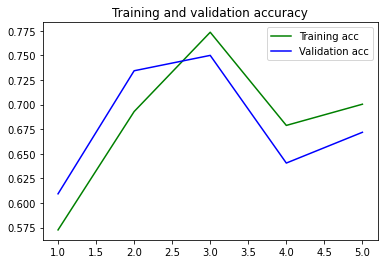

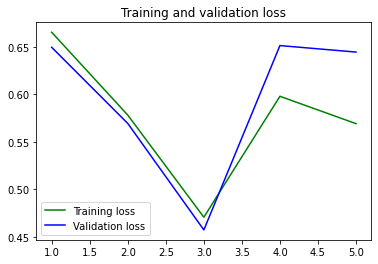

In [13]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'g', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()


plt.show()